In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from category_encoders import TargetEncoder


plt.style.use('ggplot')
pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('C:\\Users\\xzhao\\OneDrive\\Desktop\\Python_EDA\\Data\\adult.data.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [19]:
df.shape

(32561, 15)

In [20]:
#df.info()

In [21]:
#remove all records with Nan values
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

In [22]:
df.shape

(30162, 15)

# Goal 1. predict if salary is higher than 50k

## understand and encode individual feature 

In [4]:
def ud(tg):
    print('unique values are:', df[tg].unique())
    print('data description:', df[tg].describe())
    print('empty records:', df[df[tg].isna()])
    sns.set(rc={'figure.figsize':(20,5)})
    sns.countplot(x=tg, hue='salary',data=df)
#     sns.histplot(data=df, x=tg,hue='salary')

missing value % is:0.00%
unique values are: ['<=50K' '>50K']
data description: count     30162
unique        2
top       <=50K
freq      22654
Name: salary, dtype: object
empty records: Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, salary]
Index: []


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


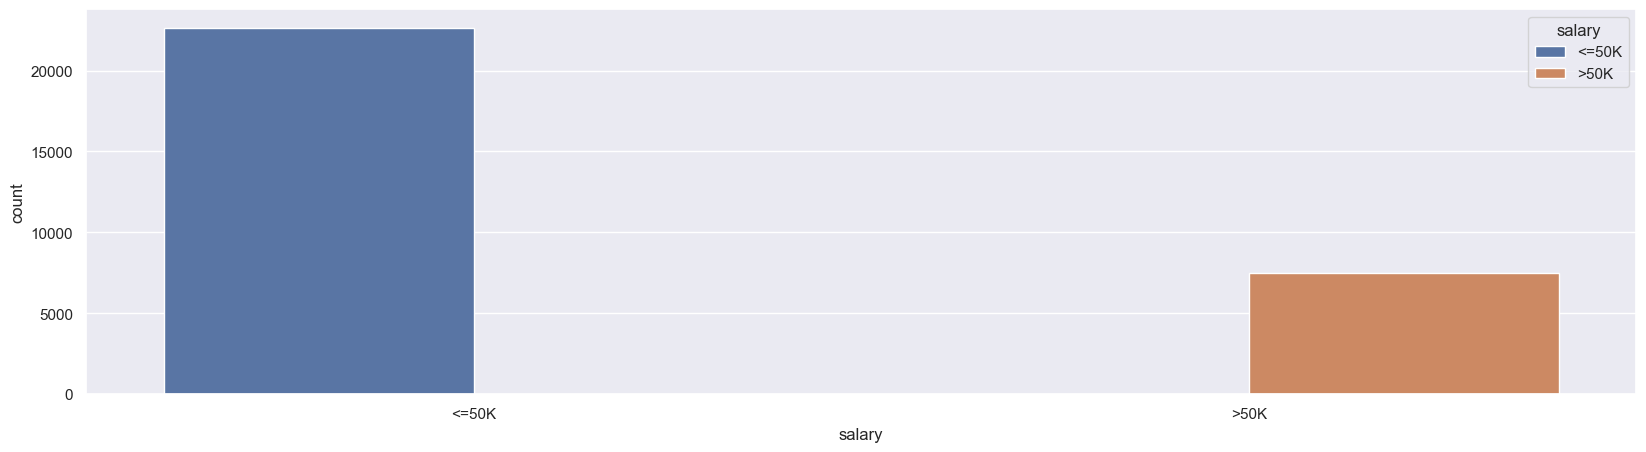

In [24]:
#first encode the target encode >50K as 1, others 0
# w=20
# h=5
tg = 'salary'
print('missing value % is:'"{:.2%}".format((df[tg] =='?').sum()/len(df)))
ud(tg)

#lable encode >50 as 1, others 0
s = ['>50K' ]
df['Target'] = df[tg].apply(lambda x: 1 if x in s else 0)
df.head()

In [5]:
#df[df['age']==90]

unique values are: [39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86]
data description: count    30162.000000
mean        38.437902
std         13.134665
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64
empty records: Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, salary, Target]
Index: []


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,Target,NewAge
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,1.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,1.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,1.0


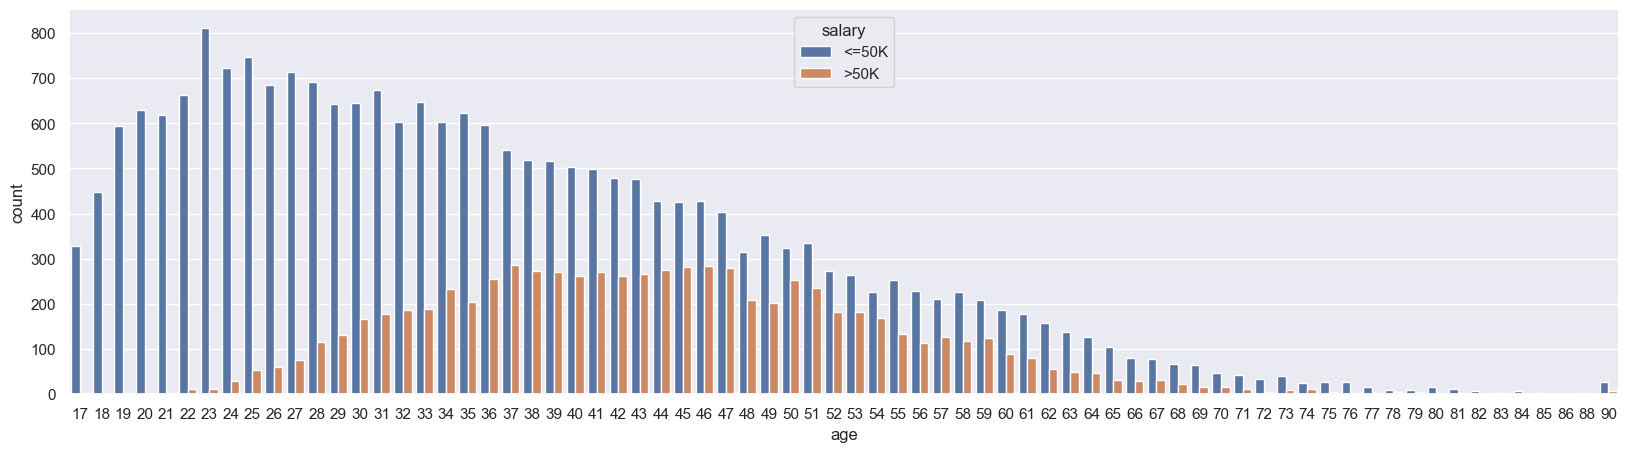

In [25]:
# w=20
# h=5
tg = 'age'
ud(tg)

# #count encode '>50' records minus '<=50' records

df_enc=df.copy()
df_enc.loc[(df[tg] >= 22) & (df[tg] <= 47), 'NewAge'] = 1
df_enc.loc[(df[tg] < 22) | (df[tg] > 47), 'NewAge'] = 0
df_enc.head()

In [227]:
#try some lineplot

missing value % is:0.00%
unique values are: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']
data description: count       30162
unique          7
top       Private
freq        22286
Name: workclass, dtype: object
empty records: Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, salary, Target]
Index: []


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,Target,NewAge,Newworkclass
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,1.0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0.0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,1.0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0.0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,1.0,0


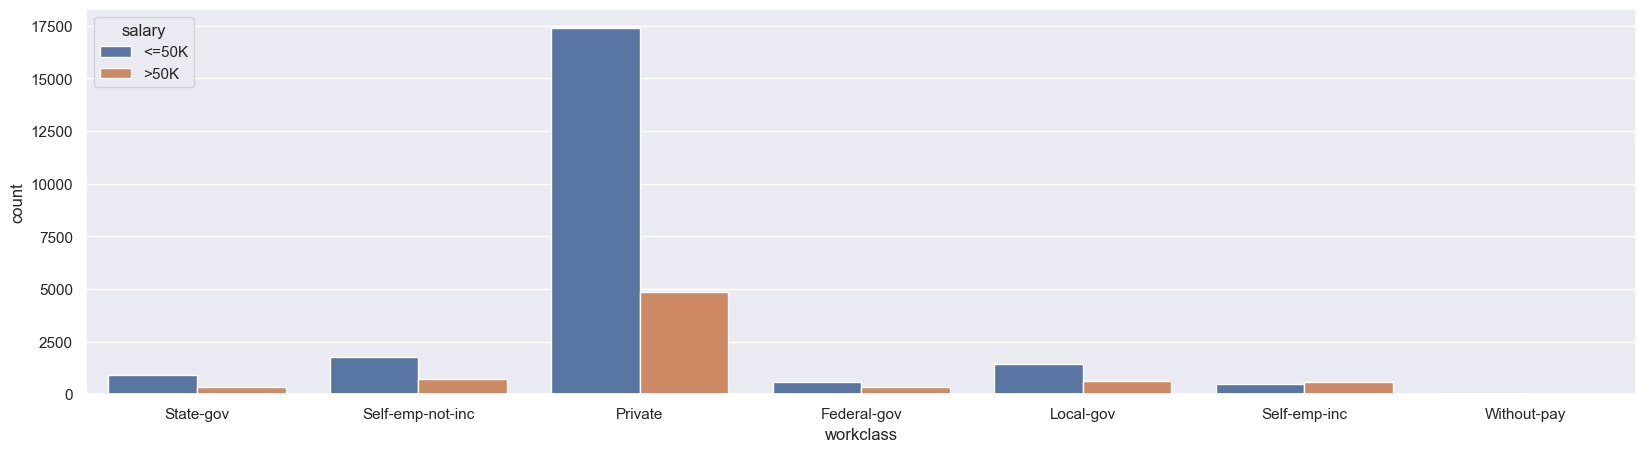

In [26]:
tg = 'workclass'
print('missing value % is:'"{:.2%}".format((df[tg] =='?').sum()/len(df)))
ud(tg)

#assign ? to private then 
#label encode federal-gov, self-emp-inc as 1, others 0
s = ['Federal-gov', 'Self-emp-inc']
df_enc['Newworkclass'] = df[tg].apply(lambda x: 1 if x in s else 0)
df_enc.head()

In [165]:
# tg = 'fnlwgt'
# print('missing value % is:'"{:.2%}".format((df[tg] =='?').sum()/len(df)))
# ud(tg)

#according to chatgpt, this should not be included in predictive modeling, which feels wrong. it should be some kind of weight

missing value % is:0.00%
unique values are: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 '7th-8th' 'Doctorate' 'Assoc-voc' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th']
data description: count       30162
unique         16
top       HS-grad
freq         9840
Name: education, dtype: object
empty records: Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, salary, Target]
Index: []


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,Target,NewAge,Newworkclass,Neweducation
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,1.0,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0.0,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,1.0,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0.0,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,1.0,0,1


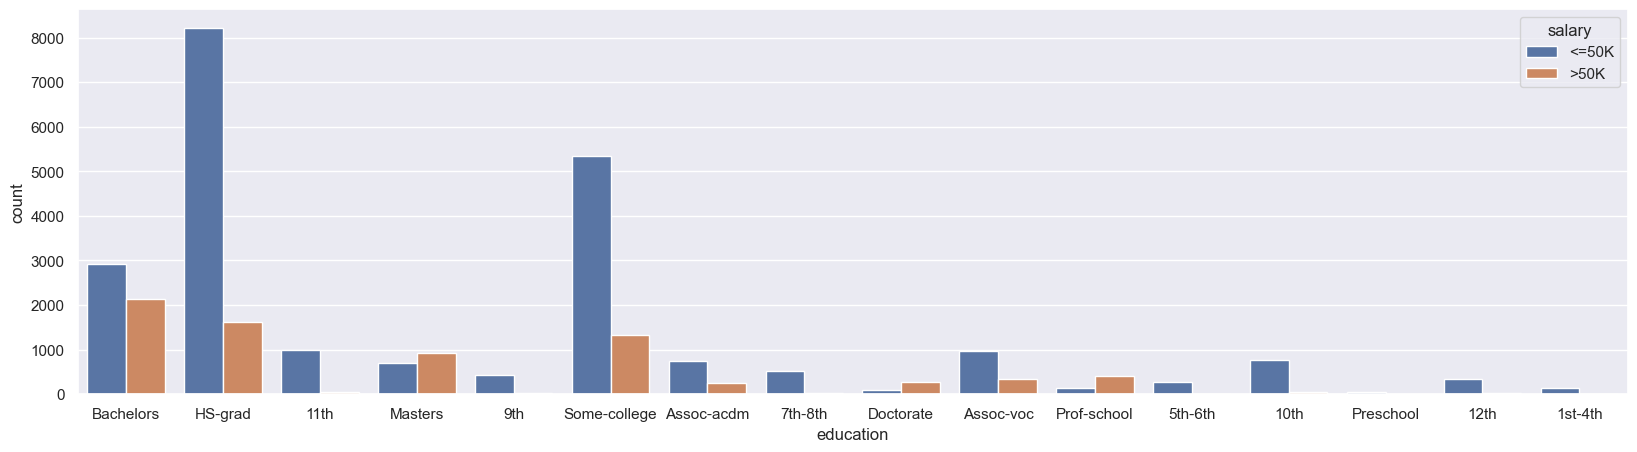

In [27]:
tg = 'education' #this covers eudction and education-num columns
print('missing value % is:'"{:.2%}".format((df[tg] =='?').sum()/len(df)))
ud(tg)

#label encode Bachelors,master,doc,prof schoool as 1, others 0
s = ['Bachelors', 'Masters', 'Doctorate', 'Prof-school' ]
df_enc['Neweducation'] = df[tg].apply(lambda x: 1 if x in s else 0)
df_enc.head()

missing value % is:0.00%
unique values are: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
data description: count                  30162
unique                     7
top       Married-civ-spouse
freq                   14065
Name: marital-status, dtype: object
empty records: Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, salary, Target]
Index: []


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,Target,NewAge,Newworkclass,Neweducation,Newmaritals
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,1.0,0,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0.0,0,1,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,1.0,0,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0.0,0,0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,1.0,0,1,1


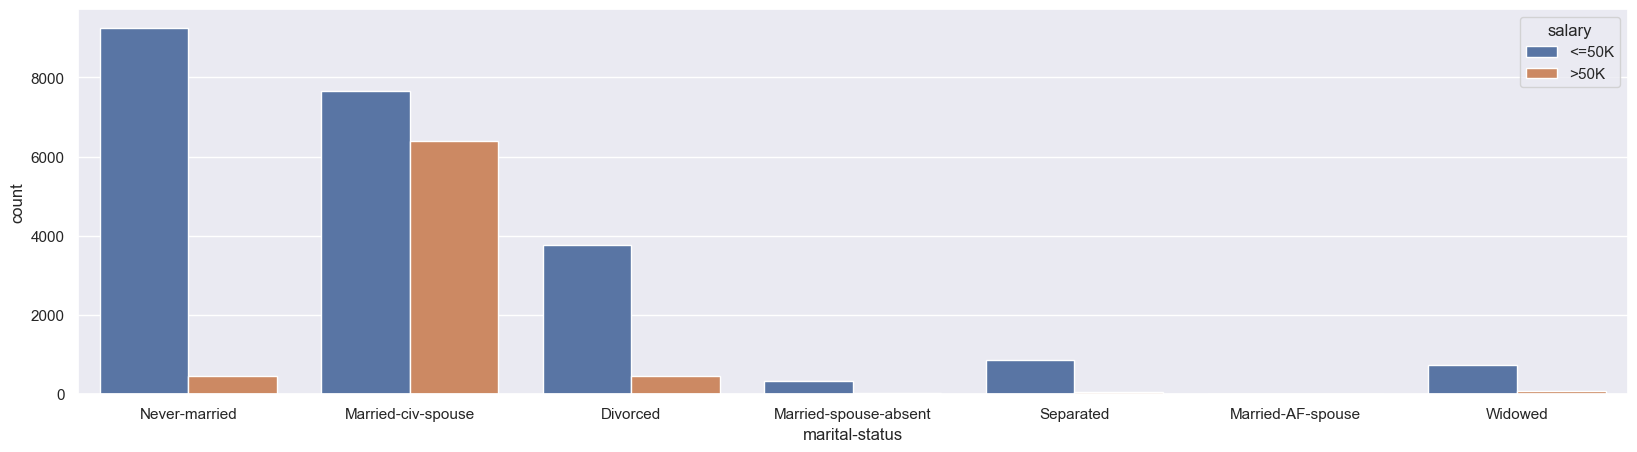

In [28]:
tg = 'marital-status'
print('missing value % is:'"{:.2%}".format((df[tg] =='?').sum()/len(df)))
ud(tg)

#label encode Married-civ-spouse as 1, others 0
s = ['Married-civ-spouse' ]
df_enc['Newmaritals'] = df[tg].apply(lambda x: 1 if x in s else 0)
df_enc.head()

missing value % is:0.00%
unique values are: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']
data description: count              30162
unique                14
top       Prof-specialty
freq                4038
Name: occupation, dtype: object
empty records: Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, salary, Target]
Index: []


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,Target,NewAge,Newworkclass,Neweducation,Newmaritals,Newoccupation
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,1.0,0,1,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0.0,0,1,1,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,1.0,0,0,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0.0,0,0,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,1.0,0,1,1,1


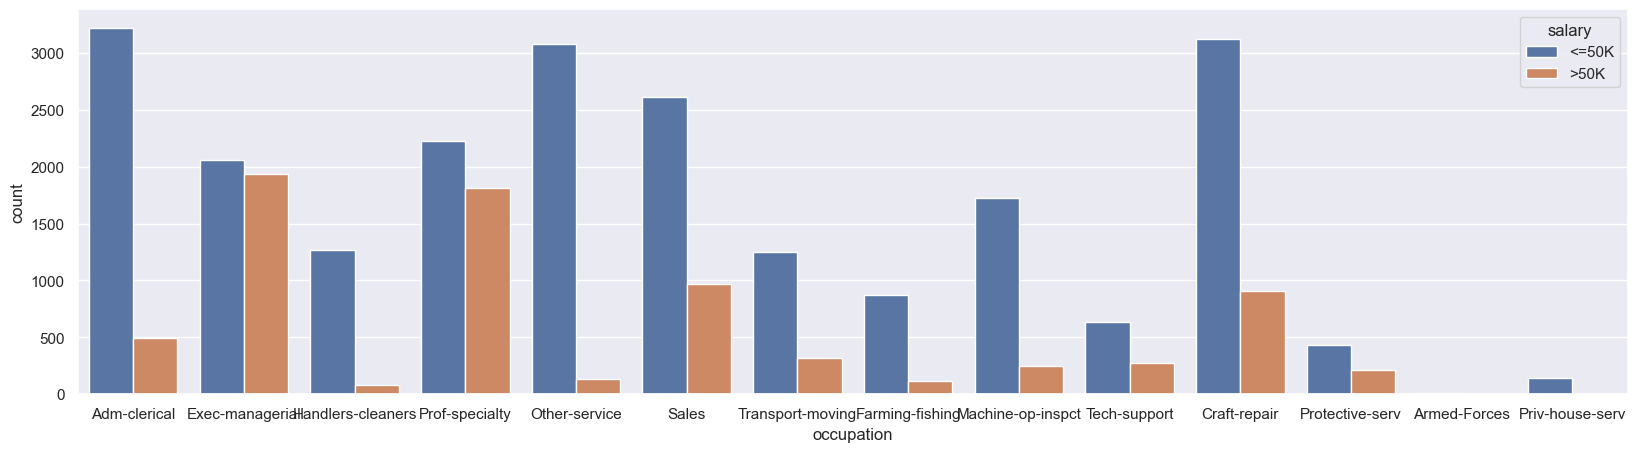

In [29]:
tg = 'occupation'
print('missing value % is:'"{:.2%}".format((df[tg] =='?').sum()/len(df)))
ud(tg)

#? is not significant for the timebeing
#label encode 'Exec-managerial', 'Prof-specialty' as 1, others 0
s = ['Exec-managerial', 'Prof-specialty' ]
df_enc['Newoccupation'] = df[tg].apply(lambda x: 1 if x in s else 0)
df_enc.head()

missing value % is:0.00%
unique values are: ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
data description: count       30162
unique          6
top       Husband
freq        12463
Name: relationship, dtype: object
empty records: Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, salary, Target]
Index: []


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,Target,NewAge,Newworkclass,Neweducation,Newmaritals,Newoccupation,Newrelat
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,1.0,0,1,0,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0.0,0,1,1,1,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,1.0,0,0,0,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0.0,0,0,1,0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,1.0,0,1,1,1,1


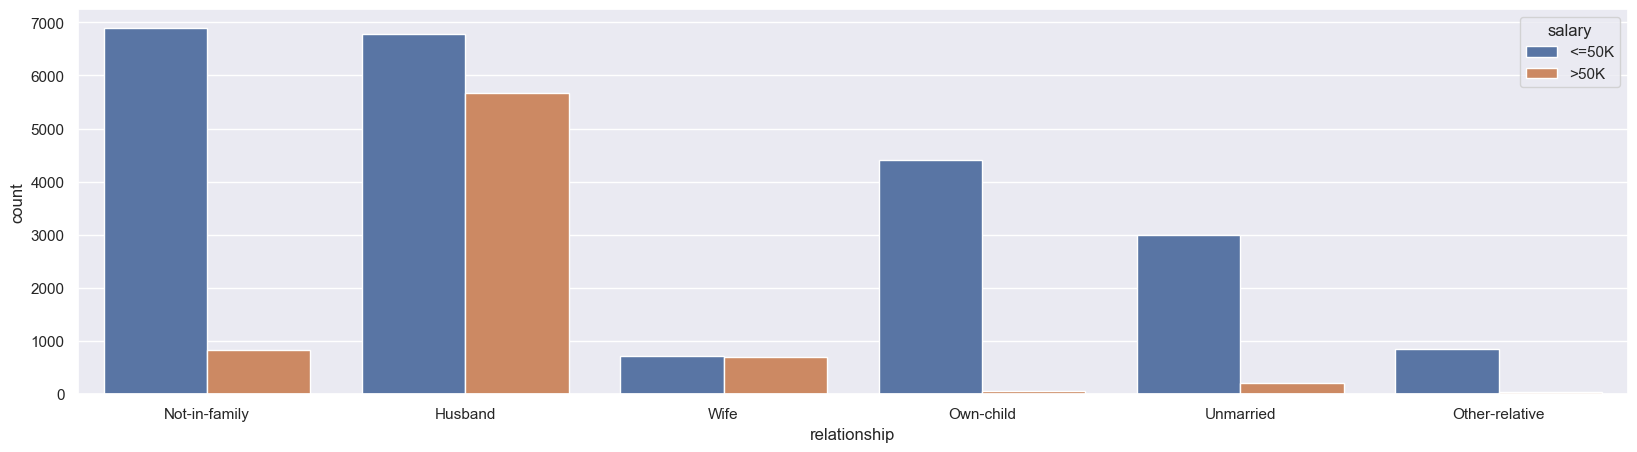

In [30]:
tg = 'relationship'
print('missing value % is:'"{:.2%}".format((df[tg] =='?').sum()/len(df)))
ud(tg)

#want to do target encoding to capture the fact that a smaller proportion earn >50k than their working wives
#target encoder install issue
#on a broder stroke, it's a highly correlated feature to marital status, so be it

#label encode husband and wife as 1, others 0
s = ['Husband', 'Wife' ]
df_enc['Newrelat'] = df[tg].apply(lambda x: 1 if x in s else 0)
df_enc.head()


missing value % is:0.00%
unique values are: ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
data description: count     30162
unique        5
top       White
freq      25933
Name: race, dtype: object
empty records: Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, salary, Target]
Index: []


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,Target,NewAge,Newworkclass,Neweducation,Newmaritals,Newoccupation,Newrelat,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,1.0,0,1,0,0,0,0,0,0,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0.0,0,1,1,1,1,0,0,0,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,1.0,0,0,0,0,0,0,0,0,0,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0.0,0,0,1,0,1,0,0,1,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,1.0,0,1,1,1,1,0,0,1,0,0


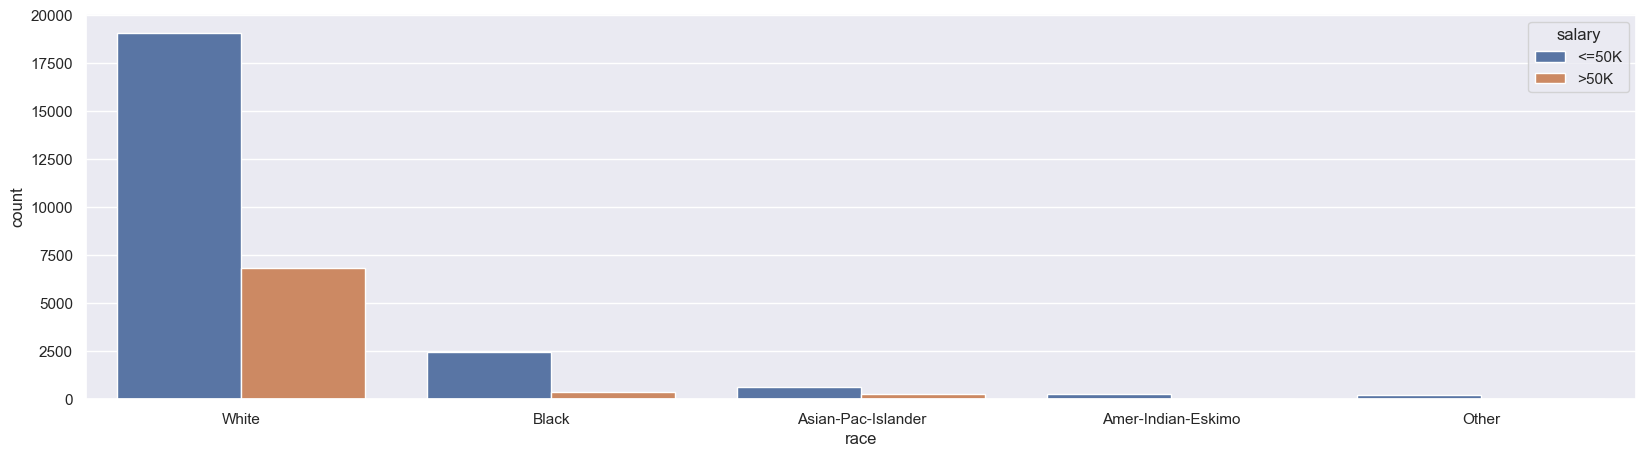

In [31]:
tg = 'race'
print('missing value % is:'"{:.2%}".format((df[tg] =='?').sum()/len(df)))
ud(tg)

#one-hot encoding
one_hot = pd.get_dummies(df[tg])

df_enc = pd.concat([df_enc,one_hot], axis = 1)


df_enc.head()

missing value % is:0.00%
unique values are: ['Male' 'Female']
data description: count     30162
unique        2
top        Male
freq      20380
Name: sex, dtype: object
empty records: Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, salary, Target]
Index: []


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,Target,NewAge,Newworkclass,Neweducation,Newmaritals,Newoccupation,Newrelat,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Newsex
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,1.0,0,1,0,0,0,0,0,0,0,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0.0,0,1,1,1,1,0,0,0,0,1,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,1.0,0,0,0,0,0,0,0,0,0,1,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0.0,0,0,1,0,1,0,0,1,0,0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,1.0,0,1,1,1,1,0,0,1,0,0,0


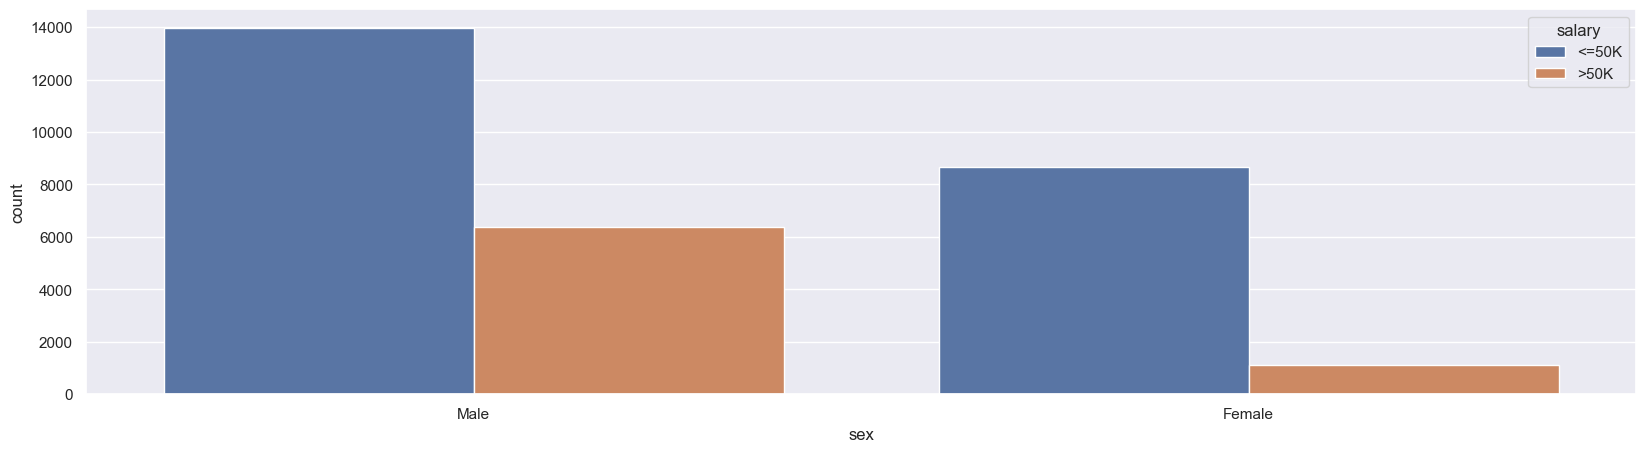

In [32]:
tg = 'sex'
print('missing value % is:'"{:.2%}".format((df[tg] =='?').sum()/len(df)))
ud(tg)

#label encode 'male' as 1, others 0
s = ['Male']
df_enc['Newsex'] = df[tg].apply(lambda x: 1 if x in s else 0)
df_enc.head()

missing value % is:0.00%
0 value % is:91.59%
unique values are: [ 2174     0 14084  5178  5013  2407 14344 15024  7688  4064  4386  7298
  1409  3674  1055  2050  2176   594 20051  6849  4101  8614  3411  2597
 25236  4650  2463  3103 10605  2964  3325  2580  3471  4865 99999  6514
  1471  2329  2105  2885 10520  2202  2961 27828  6767  2228  1506 13550
  2635  5556  4787  3781  3137  3818   914   401  2829  2977  4934  2062
  2354  3464  5455 15020  1424  3273 22040  4416 10566  4931  7430 34095
  6497  3908   114  2346  2907  1151  9386  2414  2290  3418 15831 41310
  4508  2538  3456  1848  3887  7896  5721  9562  6418  1455  2036  3942
  1831 11678  2936  2993  7443  6360  4687  1797  6723  2009  3432  6097
  1639  2653 18481 25124  7978   991  1173  2387  5060  1086]
data description: count    30162.000000
mean      1092.007858
std       7406.346497
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dty

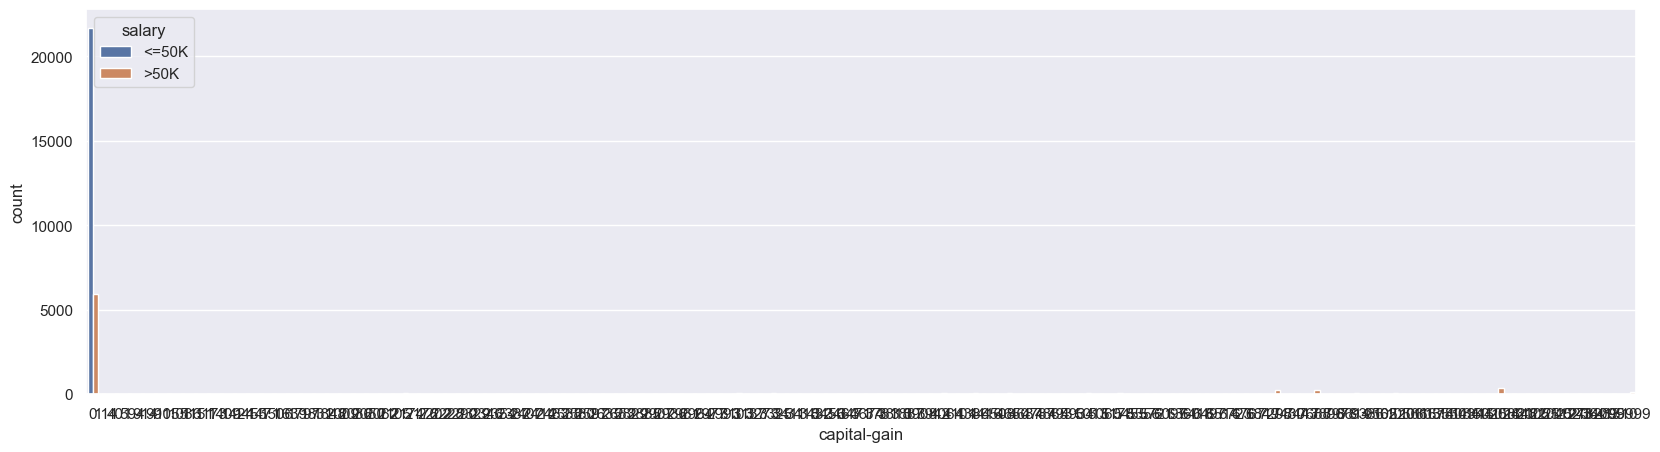

In [33]:
#it seems like capital gain/loss are not predictive of target
tg = 'capital-gain'
print('missing value % is:'"{:.2%}".format((df[tg] =='?').sum()/len(df)))
print('0 value % is:'"{:.2%}".format((df[tg] ==0).sum()/len(df)))
ud(tg)

missing value % is:0.00%
0 value % is:95.27%
unique values are: [   0 2042 1408 1902 1887 1719 1762 1564 2179 1816 1980 1977 1876 1340
 2206 1741 1485 2339 2415 1380 1721 2051 2377 1669 2352 1672  653 2392
 1504 1590 1651 1628 1848 2001 1740 2002 1579 2258 1602 2547 2205 1726
 2444 1138 2238  625  213 1539  880 1668 1092 1594 2231 1844  810 2824
 2559 2057 1573 1974  974 2174 2149 1735 1258 2603 2282  323 2246 1617
 1648 1825 3770 1755 3683 2129 4356 2267 2080 2457  419  155 3900 2201
 1944 2467 2754 2472 3004 1411]
data description: count    30162.000000
mean        88.372489
std        404.298370
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64
empty records: Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, salary, Target]
Index: []


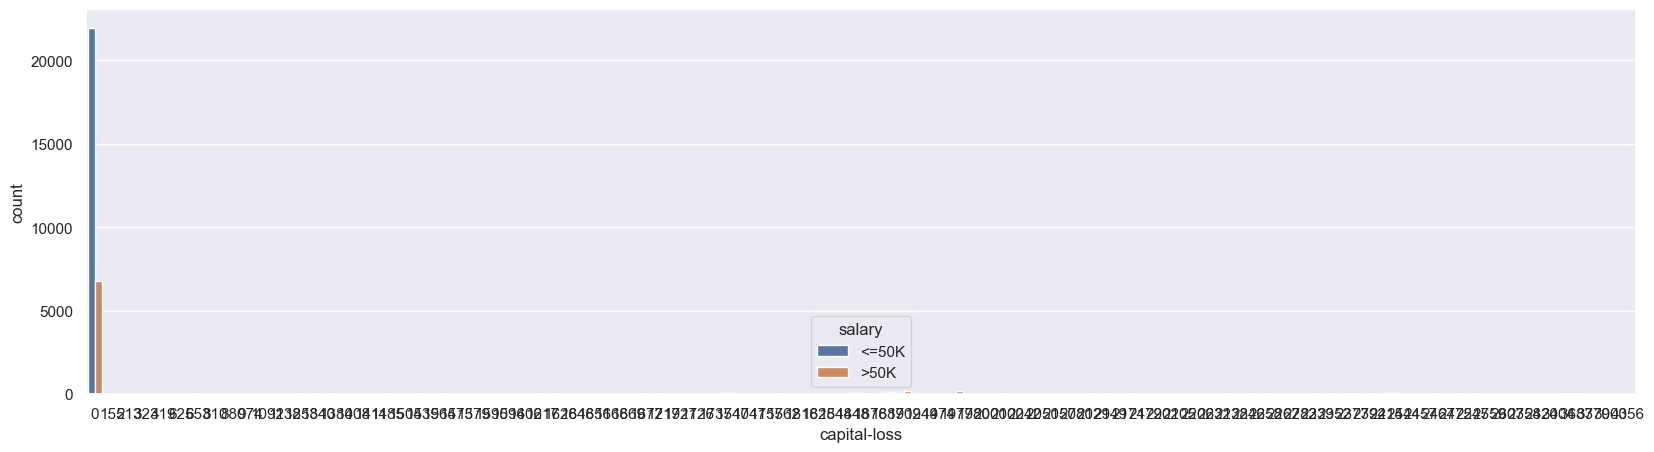

In [34]:
tg = 'capital-loss'
print('missing value % is:'"{:.2%}".format((df[tg] =='?').sum()/len(df)))
print('0 value % is:'"{:.2%}".format((df[tg] ==0).sum()/len(df)))
ud(tg)

In [3]:
tg = 'hours-per-week'
print('missing value % is:'"{:.2%}".format((df[tg] =='?').sum()/len(df)))
ud(tg)

#label encode 50 55  60 as 1, others 0
s = ['45', '50','55','60']
df_enc['Newhpw'] = df[tg].apply(lambda x: 1 if x in s else 0)
df_enc.head()

missing value % is:0.00%


NameError: name 'ud' is not defined

In [ ]:
#use cross tab

missing value % is:0.00%
unique values are: ['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'Puerto-Rico'
 'Honduras' 'England' 'Canada' 'Germany' 'Iran' 'Philippines' 'Poland'
 'Columbia' 'Cambodia' 'Thailand' 'Ecuador' 'Laos' 'Taiwan' 'Haiti'
 'Portugal' 'Dominican-Republic' 'El-Salvador' 'France' 'Guatemala'
 'Italy' 'China' 'South' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']
data description: count             30162
unique               41
top       United-States
freq              27504
Name: native-country, dtype: object
empty records: Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, salary, Target]
Index: []


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,Target,NewAge,Newworkclass,Neweducation,Newmaritals,Newoccupation,Newrelat,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Newsex,Newhpw,Newnc
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,1.0,0,1,0,0,0,0,0,0,0,1,1,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0.0,0,1,1,1,1,0,0,0,0,1,1,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,1.0,0,0,0,0,0,0,0,0,0,1,1,0,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0.0,0,0,1,0,1,0,0,1,0,0,1,0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,1.0,0,1,1,1,1,0,0,1,0,0,0,0,0


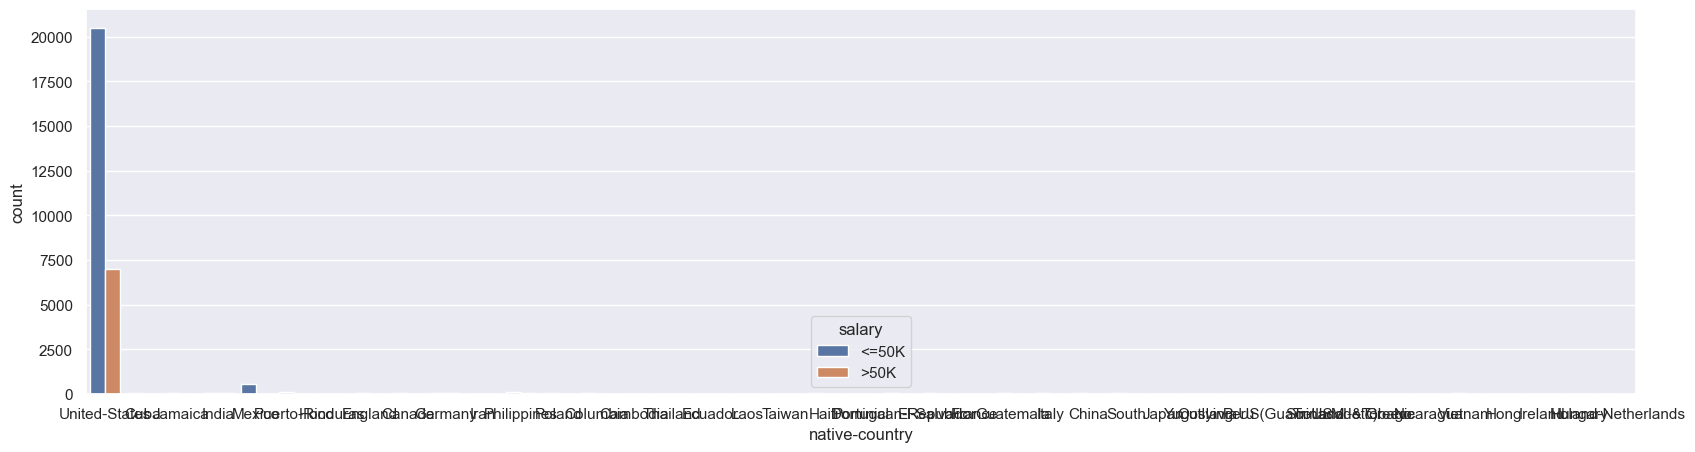

In [36]:
tg = 'native-country'
print('missing value % is:'"{:.2%}".format((df[tg] =='?').sum()/len(df)))
ud(tg)

#label encode us as 1, others 0
s = ['United-States']
df_enc['Newnc'] = df[tg].apply(lambda x: 1 if x in s else 0)
df_enc.head()

## Goal 1.1 One hot encoding every original categorical feature

In [14]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


##  feature association

In [6]:
#pairplot good for evaluating 2
def pairp(x,y):
    sns.pairplot(df,x_vars=x,y_vars=y,hue='salary',height=4, aspect=4)
    plt.show()

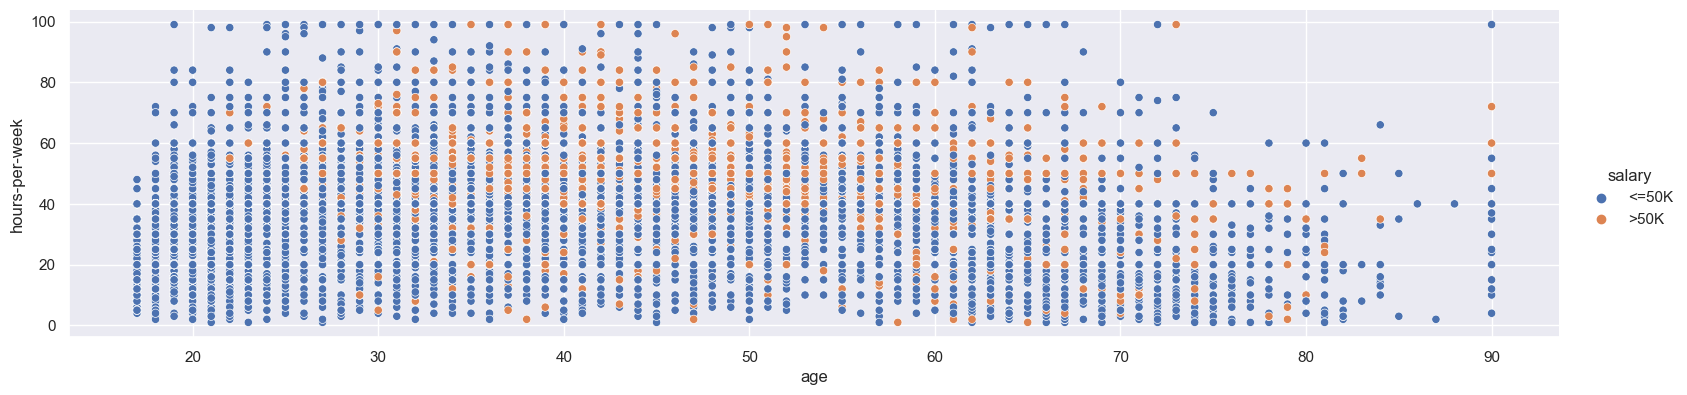

In [25]:
x='age'
y='hours-per-week'
pairp(x,y)

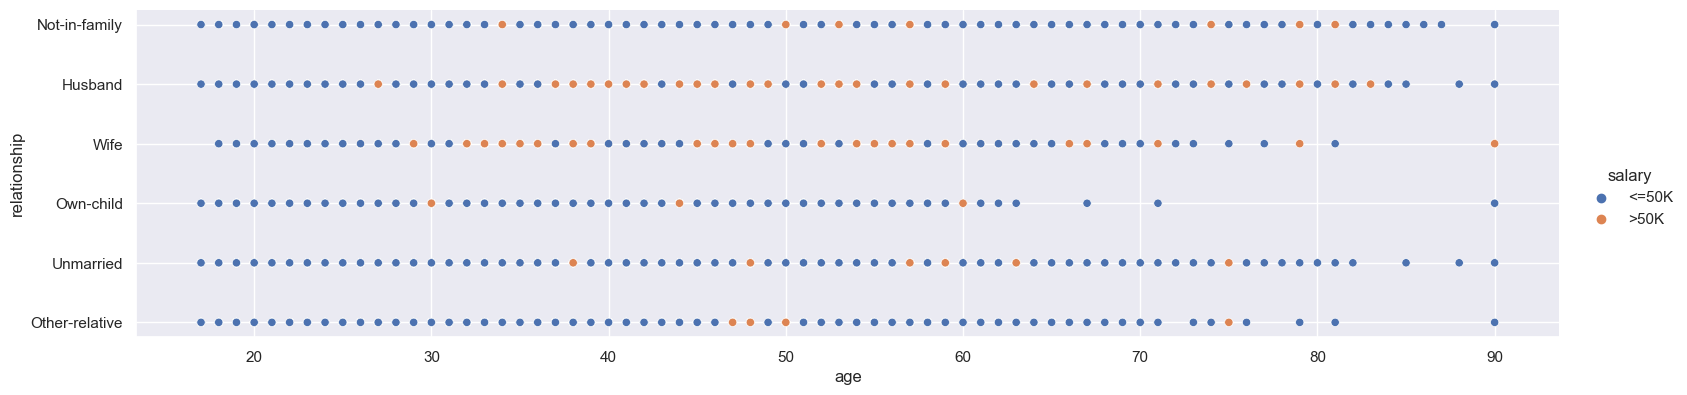

In [202]:
x='age'
y='relationship'
pairp(x,y)

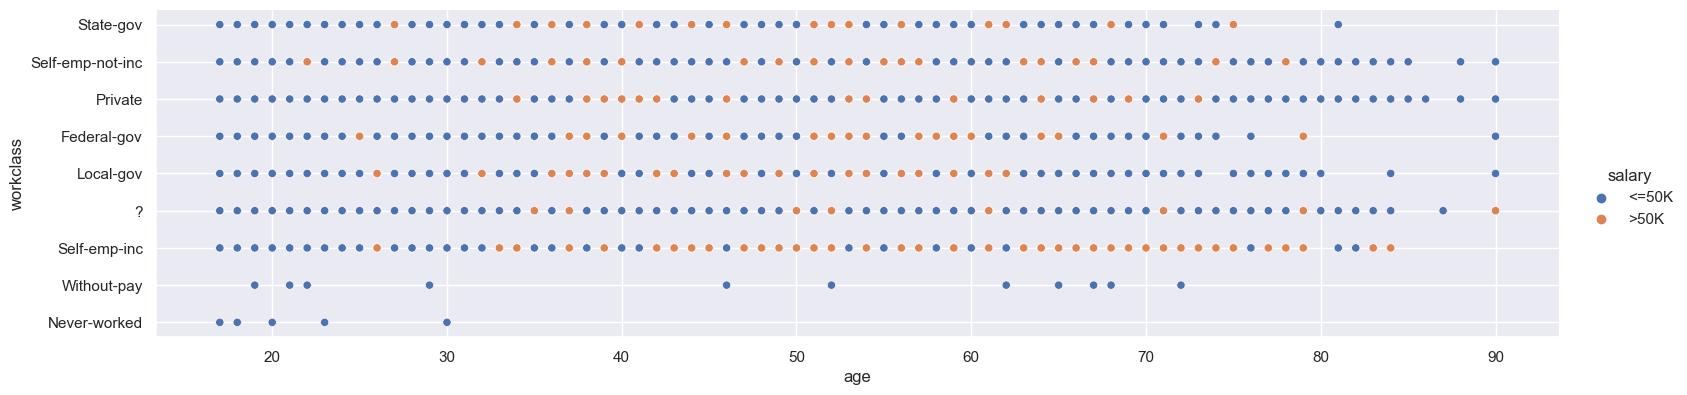

In [201]:
x='age'
y='workclass'
pairp(x,y)

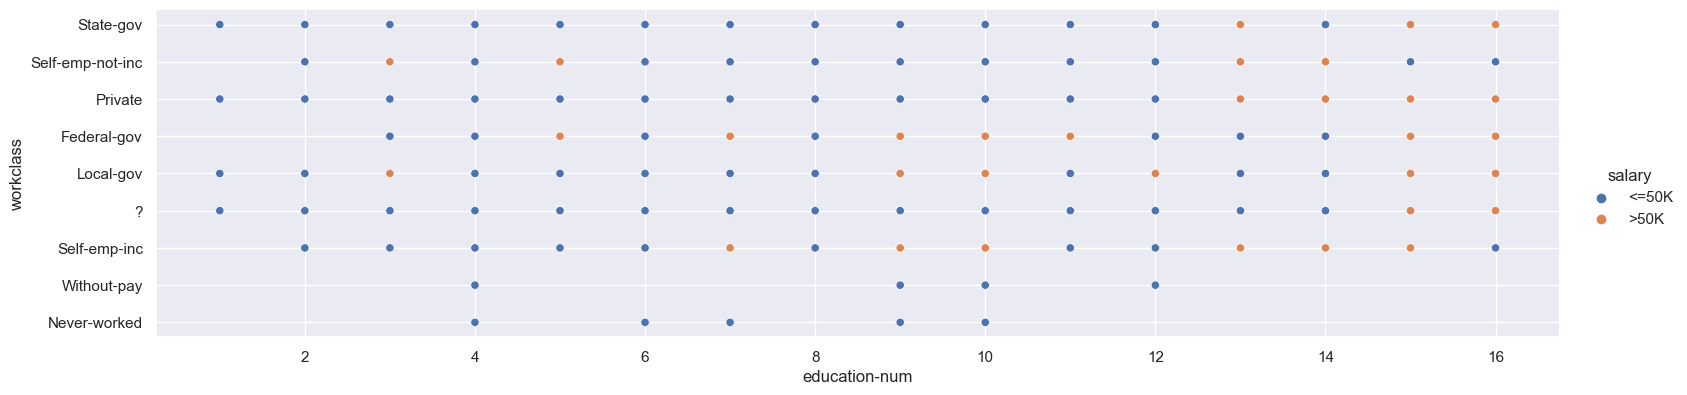

        education  education-num
224     Preschool              1
160       1st-4th              2
56        5th-6th              3
15        7th-8th              4
6             9th              5
77           10th              6
3            11th              7
415          12th              8
2         HS-grad              9
10   Some-college             10
14      Assoc-voc             11
13     Assoc-acdm             12
0       Bachelors             13
5         Masters             14
52    Prof-school             15
20      Doctorate             16


In [98]:
x='education-num'
y='workclass'
pairp(x,y)

L_edu = df.iloc[:,3:5].drop_duplicates().sort_values(by='education-num')
print(L_edu)

In [75]:
def scatp(x,y):
    sns.scatterplot(data=df,x=x,y=y,hue_order='salary')
    plt.show()

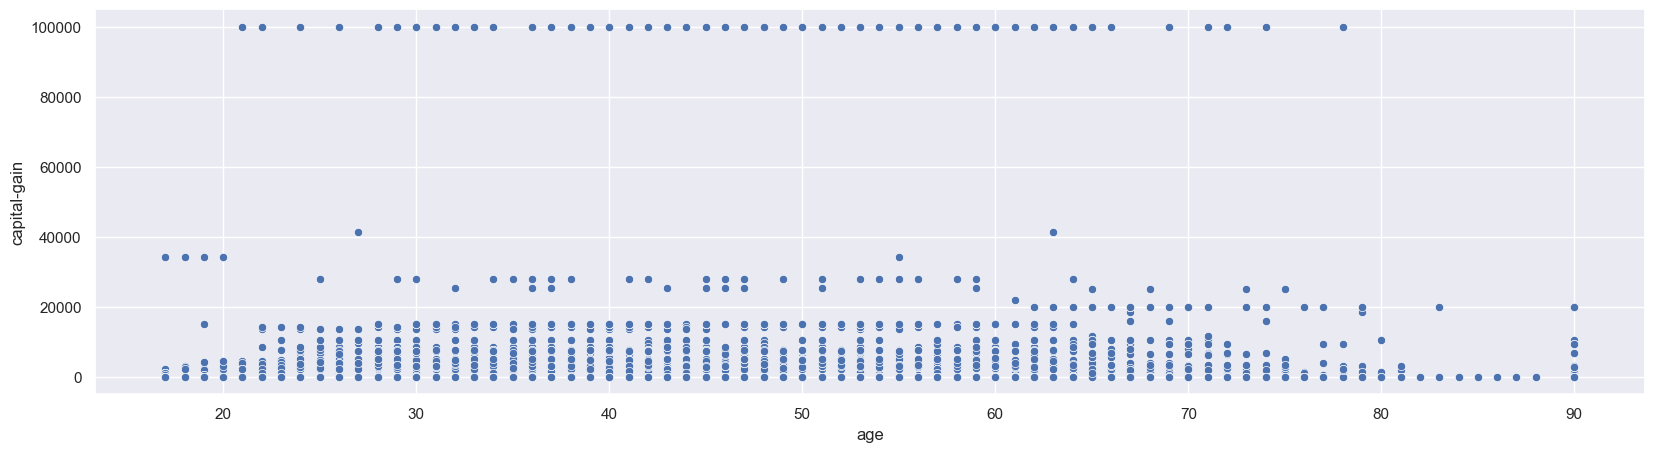

In [79]:
x='age'
y='capital-gain'
scatp(x,y)

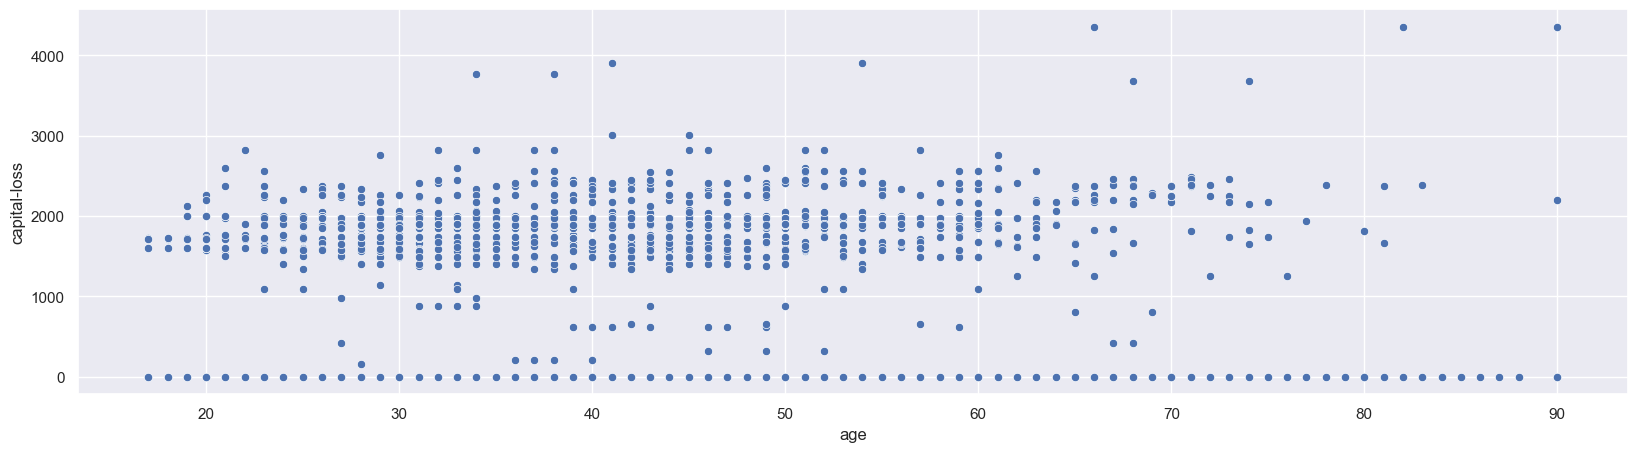

In [78]:
x='age'
y='capital-loss'
scatp(x,y)

In [12]:
def vio(x,y):
    nonzero_df = df.loc[df[y]!=0]
    sns.violinplot(data=nonzero_df,x=x,y=y)
    plt.show()

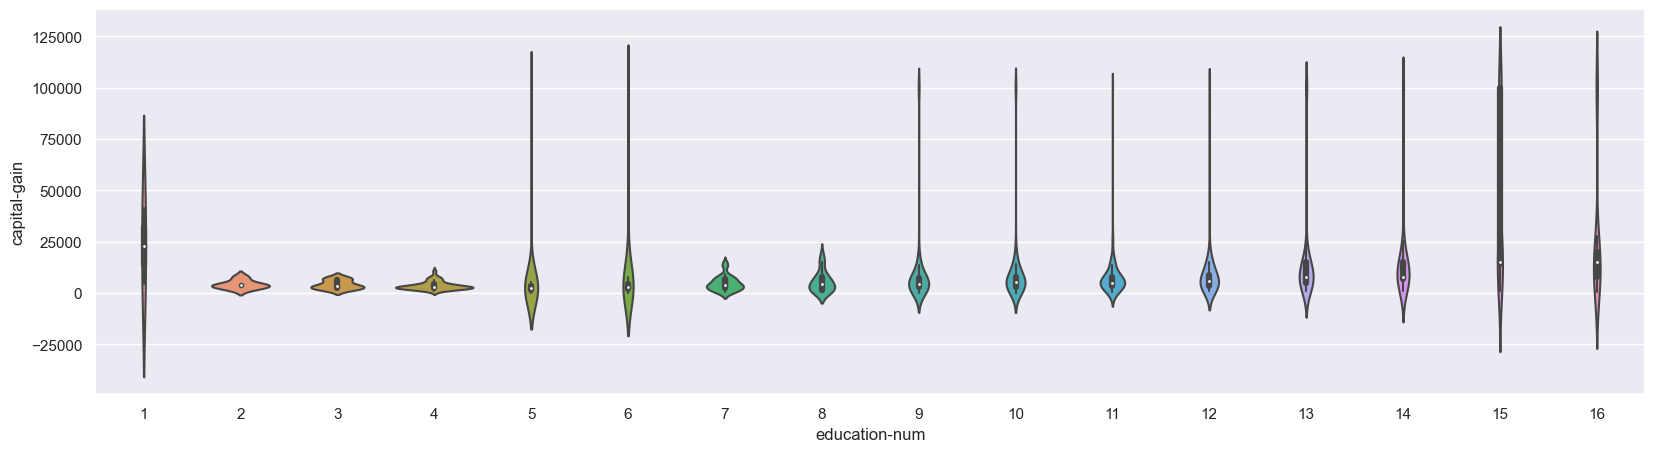

In [119]:
x='education-num'
y='capital-gain'
vio(x,y)

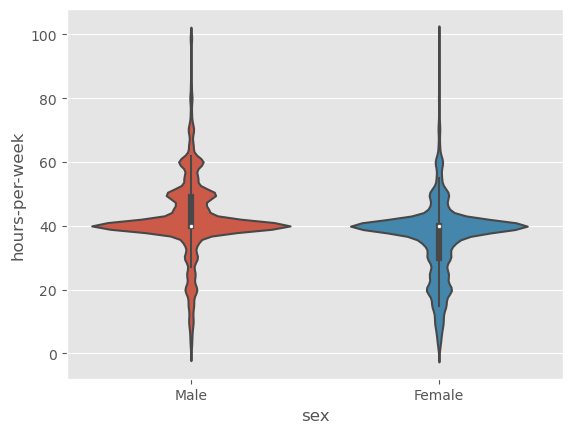

In [13]:
x='sex'
y='hours-per-week'
vio(x,y)

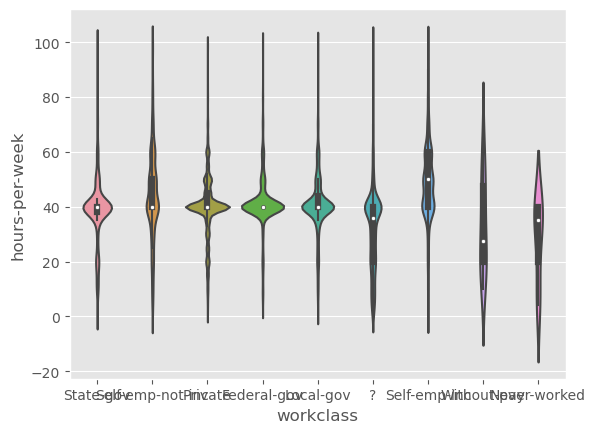

In [15]:
x='workclass'
y='hours-per-week'
vio(x,y)

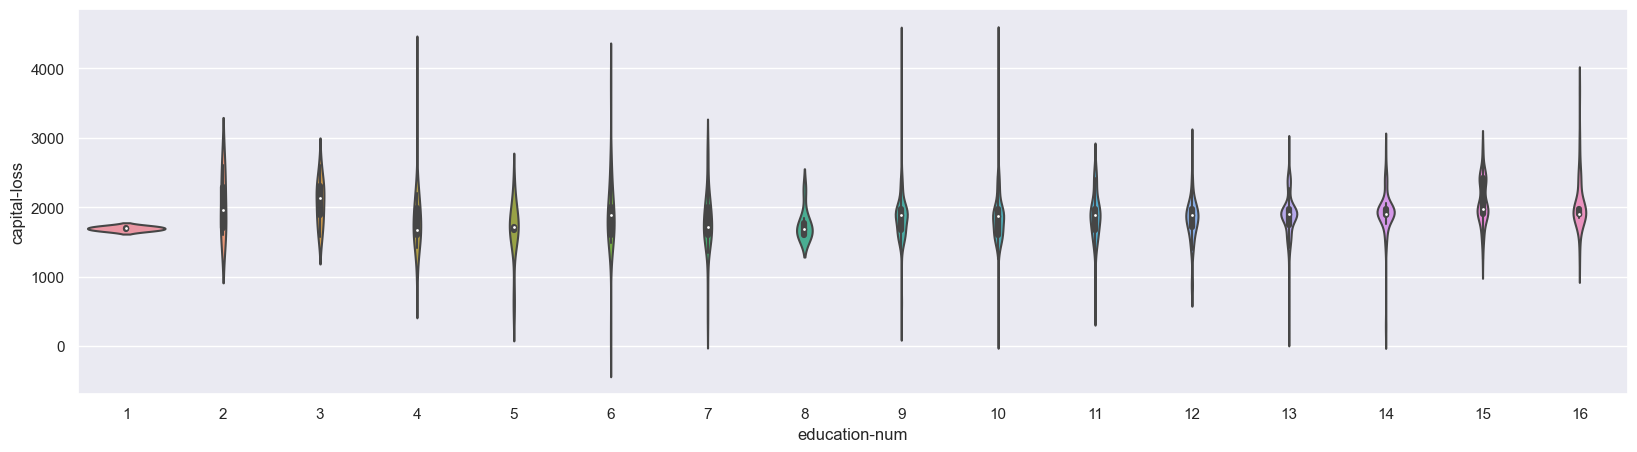

In [120]:
x='education-num'
y='capital-loss'
vio(x,y)

In [ ]:
#use barplot to check workclass vs hours per week

In [37]:
# #how do i check association between multiple categorical features
# #seems like they are highly correlated
# contingency_table = pd.crosstab(df['age'], 
#                                 [df['workclass'], df['education'],df['marital-status'], df['occupation']
#                                  #,df['race'], df['sex'],df['hours-per-week'], df['native-country']
#                                 ])
# print(contingency_table)


In [38]:
# chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# print(f"Chi-square statistic: {chi2_stat}")
# print(f"p-value: {p_val}")
# print(f"Degrees of freedom: {dof}")
# print("Expected frequencies:")
# print(expected)

#The null hypothesis is that there is no association between the variables, and the alternative hypothesis is that there is an association. In this case, the p-value is 0, so we reject the null hypothesis and conclude that there is enough evidence to suggest an association between the variables.

## Modeling

In [39]:
df_enc.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,Target,NewAge,Newworkclass,Neweducation,Newmaritals,Newoccupation,Newrelat,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Newsex,Newhpw,Newnc
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,1.0,0,1,0,0,0,0,0,0,0,1,1,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0.0,0,1,1,1,1,0,0,0,0,1,1,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,1.0,0,0,0,0,0,0,0,0,0,1,1,0,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0.0,0,0,1,0,1,0,0,1,0,0,1,0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,1.0,0,1,1,1,1,0,0,1,0,0,0,0,0


In [40]:
df_enc.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary', 'Target', 'NewAge', 'Newworkclass', 'Neweducation',
       'Newmaritals', 'Newoccupation', 'Newrelat', 'Amer-Indian-Eskimo',
       'Asian-Pac-Islander', 'Black', 'Other', 'White', 'Newsex', 'Newhpw',
       'Newnc'],
      dtype='object')

In [42]:
#24% is my baseline, too base
# len(df_enc[(df['age']>35)&(df['sex']=='Male')&(df['education-num']>10)])/len(df)
# len(df_enc[~(df['age']>35)or(~df['sex']=='Male')or(~df['education-num']>10)])/len(df)
# df_enc['Target'].mean()

In [43]:
lr = ['age', 
      #'workclass', 'fnlwgt', 'education', 'education-num',
      # 'marital-status', 'occupation', 'relationship', 'race', 'sex',
       #'capital-gain', 'capital-loss', 
      'hours-per-week', 
      #'native-country',
       #'salary', 'Target', 
      'Newsex', 'Newworkclass', 'Neweducation',
       'Newmaritals', 'Newoccupation', 'Amer-Indian-Eskimo',
       'Asian-Pac-Islander', 'Black', 'Other', 'White',
     'Newrelat']

lr2 = [#'age', 'workclass', 'fnlwgt', 'education', 'education-num',
       #'marital-status', 'occupation', 'relationship', 'race', 
    #'sex',
       #'capital-gain', 'capital-loss', 
    'hours-per-week', 
    #'native-country',
       #'salary', 'Target', 
    'NewAge', 'Newworkclass', 'Neweducation',
       'Newmaritals', 'Newoccupation', 'Newrelat', 'Amer-Indian-Eskimo',
       'Asian-Pac-Islander', 'Black', 'Other', 'White', 'Newsex', 'Newhpw',
       'Newnc']

# tr = ['age', 'workclass', 
#       #'fnlwgt', 
#       'education', 
#      #'education-num',
#        'marital-status', 'occupation', 
#       #'relationship', 
#       'race', 'sex',
#        #'capital-gain', 'capital-loss', 
#       'hours-per-week', 'native-country',
#        #'salary'
#      #, 'Target', 'Newsex', 'Newworkclass', 'Neweducation',
#        #'Newmaritals', 'Newoccupation', 'Amer-Indian-Eskimo',
#        #'Asian-Pac-Islander', 'Black', 'Other', 'White','Newrelat'
#     ]
tar = df['Target']
lr = df_enc[lr]
lr2 = df_enc[lr2]
lr2

,hours-per-week,NewAge,Newworkclass,Neweducation,Newmaritals,Newoccupation,Newrelat,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Newsex,Newhpw,Newnc
0,40,1.0,0,1,0,0,0,0,0,0,0,1,1,0,1
1,13,0.0,0,1,1,1,1,0,0,0,0,1,1,0,1
2,40,1.0,0,0,0,0,0,0,0,0,0,1,1,0,1
3,40,0.0,0,0,1,0,1,0,0,1,0,0,1,0,1
4,40,1.0,0,1,1,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,38,1.0,0,0,1,0,1,0,0,0,0,1,0,0,1
32557,40,1.0,0,0,1,0,1,0,0,0,0,1,1,0,1
32558,40,0.0,0,0,0,0,0,0,0,0,0,1,0,0,1
32559,20,1.0,0,0,0,0,0,0,0,0,0,1,1,0,1


## Logistic regression

In [44]:
from sklearn.model_selection import train_test_split
x_trainvalid, x_test, y_trainvalid, y_test = train_test_split(lr2, tar, test_size=0.15, random_state=1236)
x_train, x_valid, y_train, y_valid = train_test_split(x_trainvalid, y_trainvalid, test_size=0.1765, random_state=1236)
print(y_train.mean(),y_valid.mean(),y_test.mean())
print(len(y_train),len(y_valid),len(y_test))
# encoder = TargetEncoder()
# x_train['Newsex2'] = encoder.fit_transform(x_train['sex'],y_train)
# x_valid['Newsex2'] = encoder.fit_transform(x_valid['sex'],y_valid)
# x_test['Newsex2'] = encoder.fit_transform(x_test['sex'],y_test)

0.24763167866616143 0.2459668508287293 0.2579005524861879
21112 4525 4525


In [223]:
x_train

,hours-per-week,NewAge,Newworkclass,Neweducation,Newmaritals,Newoccupation,Newrelat,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Newsex,Newhpw,Newnc
28417,45,1.0,0,0,1,0,1,0,0,0,0,1,1,0,1
11311,60,1.0,0,0,0,0,0,0,0,1,0,0,0,0,1
26068,40,0.0,1,0,0,0,0,0,0,0,0,1,0,0,1
14435,70,1.0,1,0,1,1,1,0,0,0,0,1,1,0,1
21765,35,1.0,0,0,0,0,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23083,46,1.0,0,0,1,0,1,0,0,0,0,1,1,0,1
31416,40,1.0,0,0,0,0,0,0,0,1,0,0,0,0,1
29011,45,1.0,0,1,1,1,1,0,0,0,0,1,1,0,0
18155,50,0.0,0,1,1,1,1,0,0,0,0,1,1,0,1


In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=3000)
model.fit(x_train, y_train)
#100 fail to converge, 1000 works

LogisticRegression(max_iter=3000)

In [46]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [49]:
y_train_hat = model.predict(x_train)
y_valid_hat = model.predict(x_valid)
y_test_hat = model.predict(x_test)
report = classification_report(y_test, y_test_hat)
cm = confusion_matrix(y_test,y_test_hat) #how to have the labels show
print('train_score;valid_score;test_score:\n',accuracy_score(y_train,y_train_hat),
      accuracy_score(y_valid,y_valid_hat),
     accuracy_score(y_test,y_test_hat))
print('Classification Report:\n', report)
print(cm)

train_score;valid_score;test_score:
 0.8222811671087533 0.8137016574585635 0.8174585635359116
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      3358
           1       0.71      0.49      0.58      1167

    accuracy                           0.82      4525
   macro avg       0.78      0.71      0.73      4525
weighted avg       0.81      0.82      0.81      4525

[[3122  236]
 [ 590  577]]


## Decision tree 

In [50]:
# from sklearn.model_selection import train_test_split
# x_trainvalid, x_test, y_trainvalid, y_test = train_test_split(lr, tar, test_size=0.2, random_state=1200)
# x_train, x_valid, y_train, y_valid = train_test_split(x_trainvalid, y_trainvalid, test_size=0.25, random_state=1200)
# print(y_train.mean(),y_valid.mean(),y_test.mean())

In [51]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [52]:
#first run single tree perform worse than LR, which makes no sense
y_train_hat = clf.predict(x_train)
y_valid_hat = clf.predict(x_valid)
y_test_hat = clf.predict(x_test)
report = classification_report(y_test, y_test_hat)
cm = confusion_matrix(y_test,y_test_hat) #how to have the labels show
print('train_score;valid_score;test_score:\n',accuracy_score(y_train,y_train_hat),
      accuracy_score(y_valid,y_valid_hat),
     accuracy_score(y_test,y_test_hat))
print('Classification Report:\n', report)
print(cm)

train_score;valid_score;test_score:
 0.8474801061007957 0.8103867403314917 0.8083977900552486
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      3358
           1       0.67      0.50      0.57      1167

    accuracy                           0.81      4525
   macro avg       0.76      0.71      0.72      4525
weighted avg       0.80      0.81      0.80      4525

[[3075  283]
 [ 584  583]]


## RFT

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [54]:
#first run single tree perform worse than LR, which makes no sense
y_train_hat = rf_model.predict(x_train)
y_valid_hat = rf_model.predict(x_valid)
y_test_hat = rf_model.predict(x_test)
report = classification_report(y_test, y_test_hat)
cm = confusion_matrix(y_test,y_test_hat) #how to have the labels show
print('train_score;valid_score;test_score:\n',accuracy_score(y_train,y_train_hat),
      accuracy_score(y_valid,y_valid_hat),
     accuracy_score(y_test,y_test_hat))
print('Classification Report:\n', report)
print(cm)

train_score;valid_score;test_score:
 0.8474801061007957 0.8123756906077348 0.8099447513812155
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.88      3358
           1       0.67      0.51      0.58      1167

    accuracy                           0.81      4525
   macro avg       0.76      0.71      0.73      4525
weighted avg       0.80      0.81      0.80      4525

[[3064  294]
 [ 566  601]]


## XGBoost

In [55]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [56]:
y_train_hat = xgb_model.predict(x_train)
y_valid_hat = xgb_model.predict(x_valid)
y_test_hat = xgb_model.predict(x_test)
report = classification_report(y_test, y_test_hat)
cm = confusion_matrix(y_test,y_test_hat) #how to have the labels show
print('train_score;valid_score;test_score:\n',accuracy_score(y_train,y_train_hat),
      accuracy_score(y_valid,y_valid_hat),
     accuracy_score(y_test,y_test_hat))
print('Classification Report:\n', report)
print(cm)

train_score;valid_score;test_score:
 0.8362068965517241 0.8150276243093922 0.821878453038674
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88      3358
           1       0.70      0.53      0.61      1167

    accuracy                           0.82      4525
   macro avg       0.78      0.73      0.75      4525
weighted avg       0.81      0.82      0.81      4525

[[3096  262]
 [ 544  623]]


##  SVM

In [ ]:
from sklearn import svm
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [ ]:
# svm = svm.SVC(kernel='linear', C=1000)
# svm.fit(x_train, y_train)

## Questions 

###1. is it valid to use visulization and encoding to preserve variance 